In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')
sns.set()

In [113]:
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [115]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [116]:
df.duplicated().sum()

0

In [117]:
x = df[['TV','Radio','Newspaper']]
y = df['Sales']

TV : 


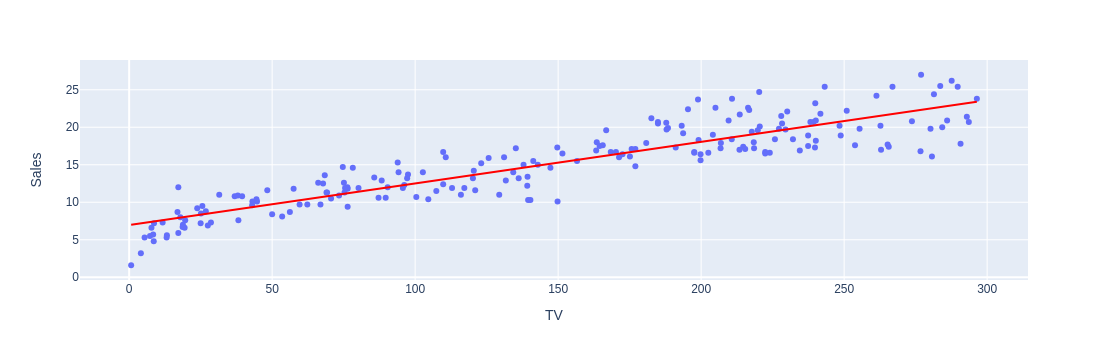

Radio : 


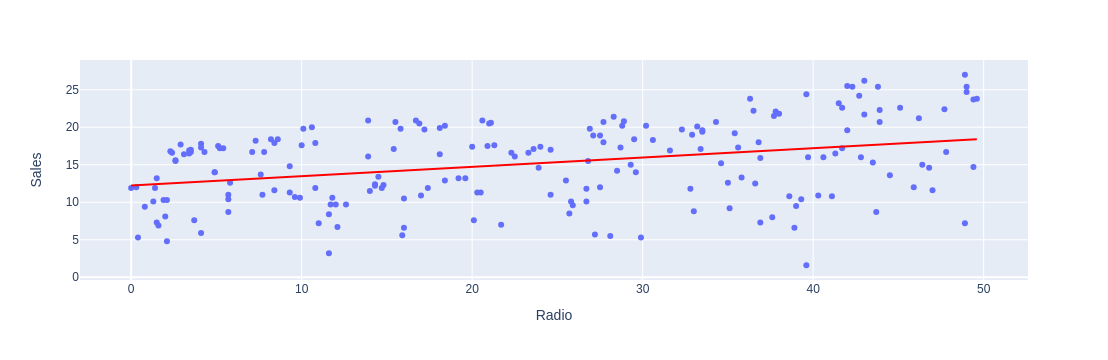

Newspaper : 


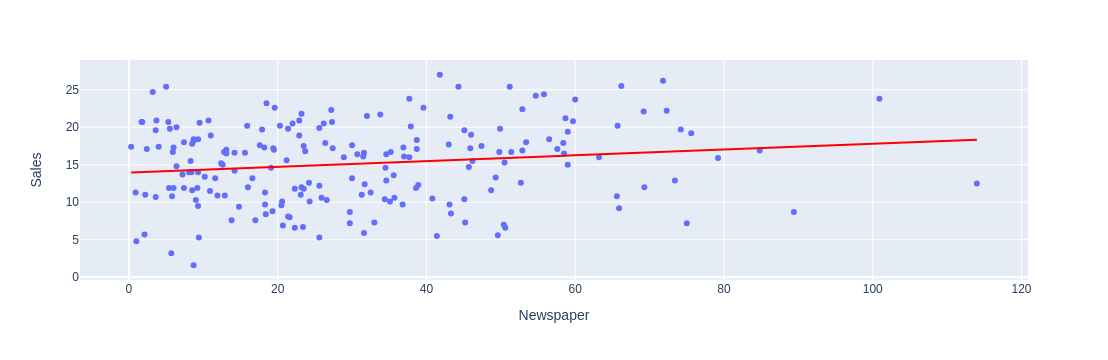

In [118]:
for col in x.columns:
    print(f'{col} : ')
    fig = px.scatter(df , x = col , y = 'Sales' , trendline='ols' , trendline_color_override = 'red')
    fig.show()

TV  : 


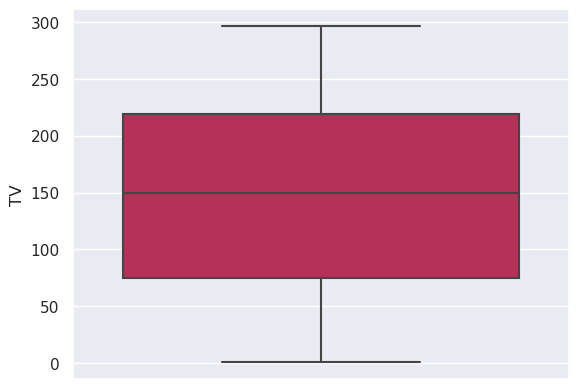

Radio  : 


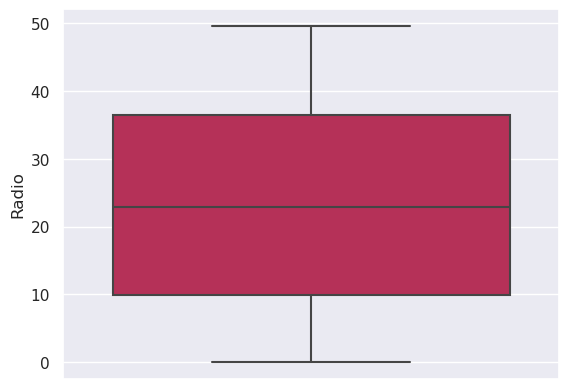

Newspaper  : 


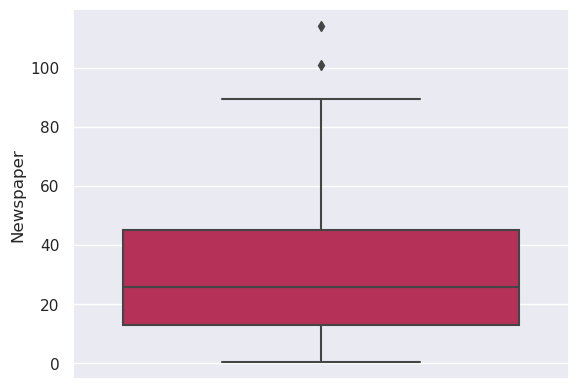

Sales  : 


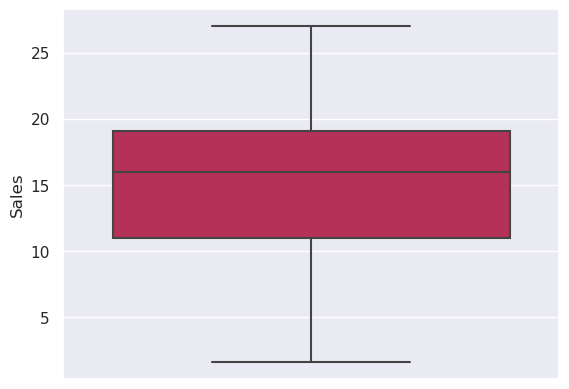

In [119]:
for col in df.columns:
    print(f'{col}  : ')
    fig = sns.boxplot( data =df  , y = col , palette= 'rocket')
    plt.show()

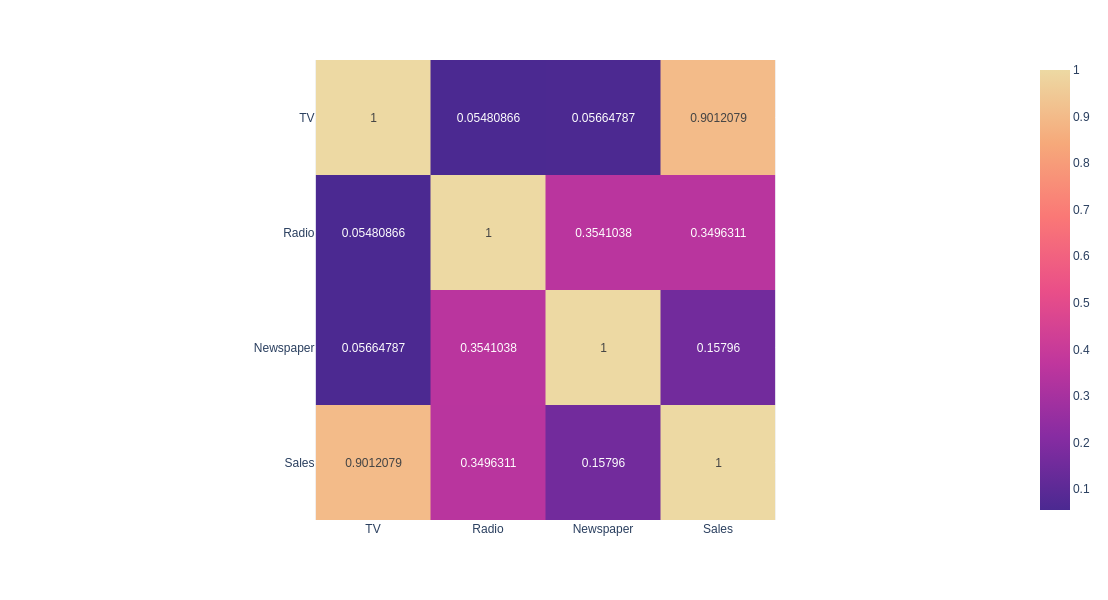

In [120]:
fig = px.imshow(df.corr(), text_auto=True, color_continuous_scale='agsunset')
fig.update_layout(width=800, height=600)
fig.show()

In [167]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.33 ,random_state = 9)

In [168]:
x_train.shape

(134, 3)

In [169]:
x_test.shape

(66, 3)

In [170]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [171]:
x_train

array([[-1.3772567 , -0.80619176, -0.06162307],
       [ 1.26852568,  0.93787741,  1.87011299],
       [-0.38406349,  1.71073943,  0.92238333],
       [-0.38406349, -0.58048869,  0.02906876],
       [-1.44987224, -0.07436666,  0.87703741],
       [-0.15450469, -1.16868457,  0.0109304 ],
       [-1.46861174,  1.58078918,  1.73407524],
       [ 0.25659298, -0.12908256,  0.74099966],
       [ 1.57304247,  1.78597379,  0.48706252],
       [-1.60681551,  0.48647127, -0.98214518],
       [-0.09711498, -1.22340047, -0.98667977],
       [-1.56933652, -1.4149061 , -1.36305088],
       [-0.78813384, -0.17011948,  0.0653455 ],
       [-0.12756666, -0.30006973,  0.16057192],
       [-0.61127986, -1.53801687, -0.35637153],
       [-1.16643739,  0.21289179, -0.47880551],
       [ 0.75318958, -0.98401842, -0.2112646 ],
       [ 0.35029045, -0.32058819, -0.01627715],
       [ 1.45592063,  1.43715996, -1.18166722],
       [ 0.91247528,  0.71217434,  0.31021345],
       [-0.73074414, -1.55853533, -0.991

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error ,r2_score

In [179]:
models = {
    'ridge' : Ridge(),
    'Lasso' : Lasso(),
    'Cat': CatBoostRegressor(verbose=False),
    'Random Forest': RandomForestRegressor(verbose=False),
    "LRG": LinearRegression(),
    "SVR":SVR(),
    "DTR":DecisionTreeRegressor(),
    "GBR":GradientBoostingRegressor(),
    "KNN":KNeighborsRegressor(),
}


Model: ridge
--------------------------------------------------------------------------------
Train RMSE: 1.72
Test RMSE: 1.48
Train R2 Score: 0.90
Test R2 Score: 0.91
--------------------------------------------------------------------------------
Model: Lasso
--------------------------------------------------------------------------------
Train RMSE: 2.18
Test RMSE: 1.95
Train R2 Score: 0.83
Test R2 Score: 0.85
--------------------------------------------------------------------------------
Model: Cat
--------------------------------------------------------------------------------
Train RMSE: 0.19
Test RMSE: 1.15
Train R2 Score: 1.00
Test R2 Score: 0.95
--------------------------------------------------------------------------------
Model: Random Forest
--------------------------------------------------------------------------------
Train RMSE: 0.56
Test RMSE: 1.08
Train R2 Score: 0.99
Test R2 Score: 0.95
-------------------------------------------------------------------------------

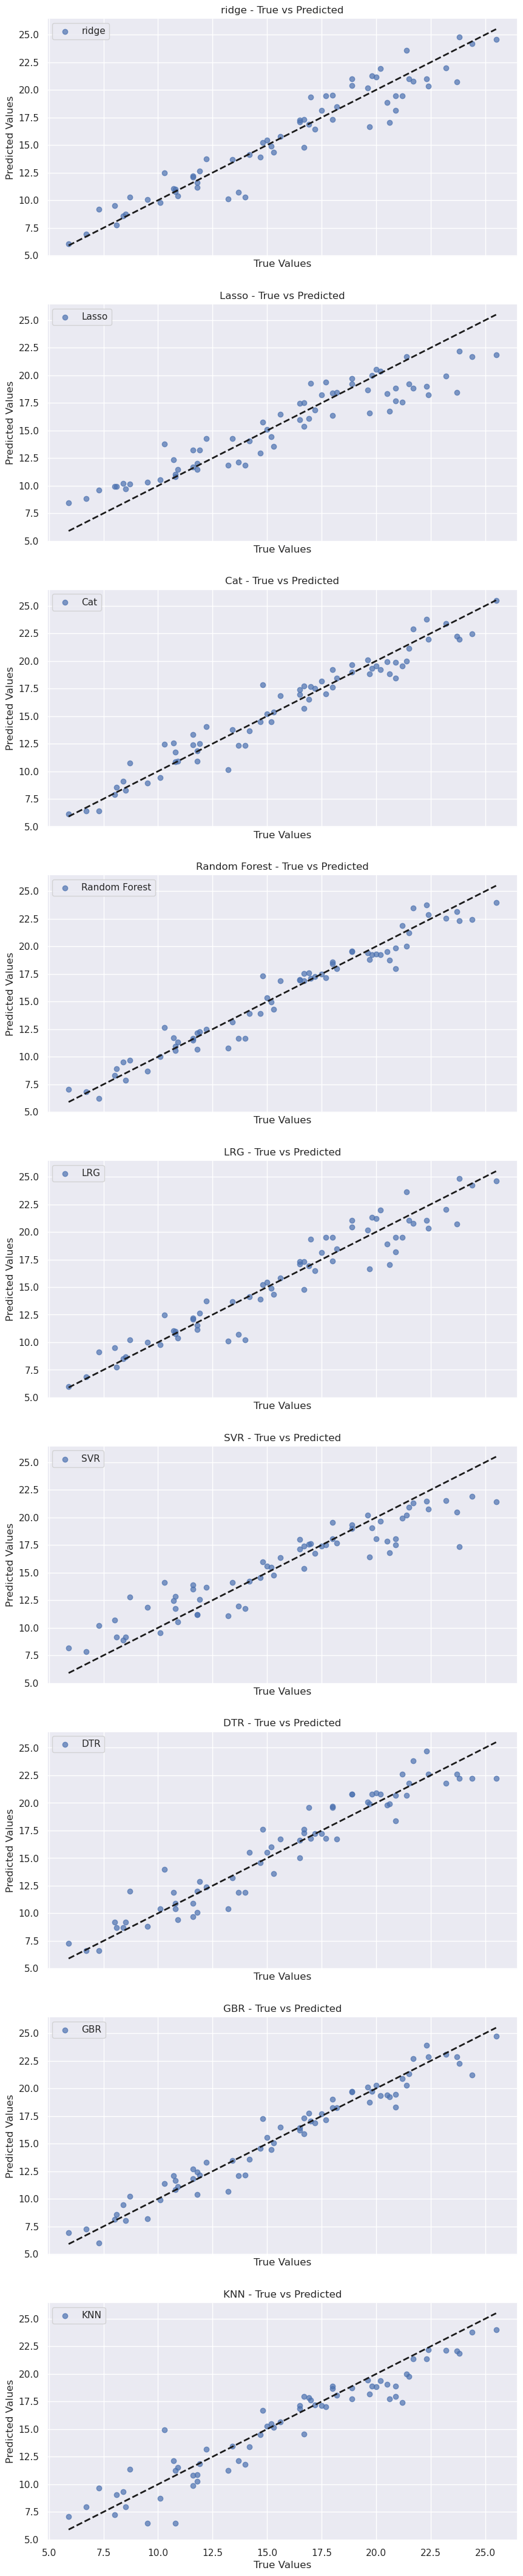

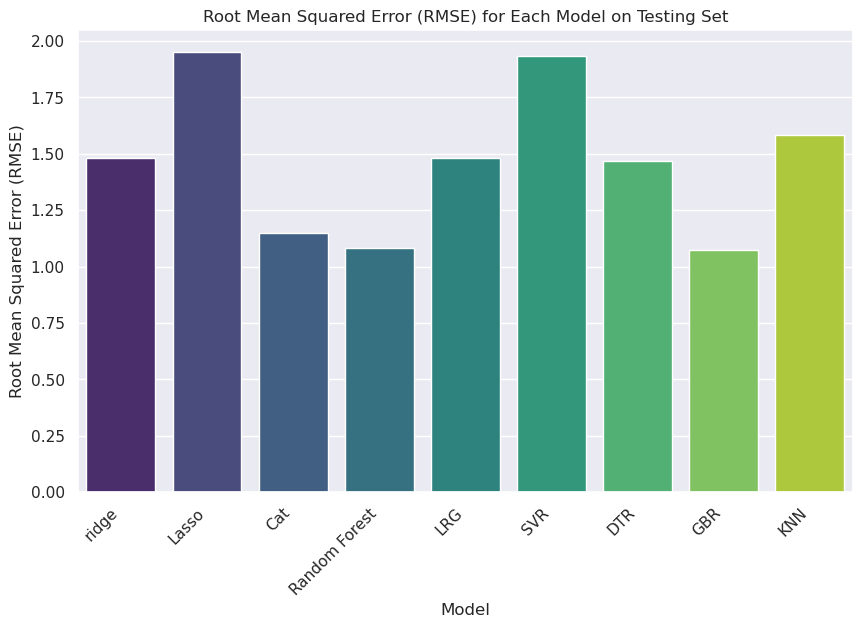

The best model based on RMSE is: GBR with RMSE: 1.07


In [180]:
fig, axs = plt.subplots(len(models), 1, figsize=(10, 6*len(models)), sharex=True)


rmse_scores = {}

for i, (name, model) in enumerate(models.items()):
    print(f"Model: {name}")
    print('-' * 80)
    model.fit(x_train, y_train)  
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    print(f"Train RMSE: {train_rmse:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    print(f"Train R2 Score: {train_r2:.2f}")
    print(f"Test R2 Score: {test_r2:.2f}")
    print('-' * 80)

    
    rmse_scores[name] = test_rmse

    axs[i].scatter(y_test, y_pred_test, label=f'{name}', alpha=0.7)
    axs[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  
    axs[i].set_title(f'{name} - True vs Predicted')
    axs[i].set_xlabel('True Values')
    axs[i].set_ylabel('Predicted Values')
    axs[i].legend()

plt.figure(figsize=(10, 6))
sns.barplot(x=list(rmse_scores.keys()), y=list(rmse_scores.values()), palette='viridis')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Root Mean Squared Error (RMSE) for Each Model on Testing Set')
plt.xticks(rotation=45, ha='right')
plt.show()

best_model_name = min(rmse_scores, key=rmse_scores.get)
print(f"The best model based on RMSE is: {best_model_name} with RMSE: {rmse_scores[best_model_name]:.2f}")

In [183]:
model =GradientBoostingRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [184]:
pd.DataFrame({'Actual value' : y_test , 'Predicted_value': y_pred.round(2)})

,Actual value,Predicted_value
84,21.7,22.71
60,8.1,8.59
54,20.2,19.38
109,19.8,19.71
156,15.3,15.09
...,...,...
136,9.5,8.22
154,20.6,19.24
177,16.7,15.91
68,18.9,19.74
